## Penguins
- Adelie, Gentoo 구분

In [69]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')

df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.0,Male
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.0,Female
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.0,Female
3,Adelie,Torgersen,43.92193,NaN,200.915205,NaN,NaN
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,NaN,200.915205,NaN,NaN
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.0,Female
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.0,Male
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.0,Female


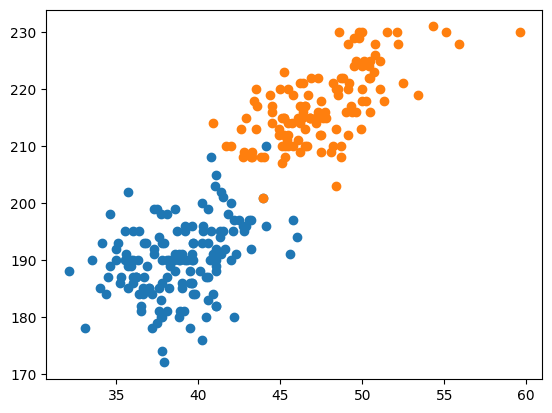

In [90]:
con1 = df['species'] == 'Adelie'
con2 = df['species'] == 'Gentoo'

p = df.loc[con1]
p1 = df.loc[con2]
plt.scatter(p['bill_length_mm'], p['flipper_length_mm'])
plt.scatter(p1['bill_length_mm'], p1['flipper_length_mm'])

In [70]:
con = df['species'].isin(['Adelie', 'Gentoo'])
p_data = df.loc[con, ['bill_length_mm', 'flipper_length_mm']]
p_target = df.loc[con, ['species']]

In [71]:
train_input, test_input, train_target, test_target = train_test_split(p_data, p_target)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

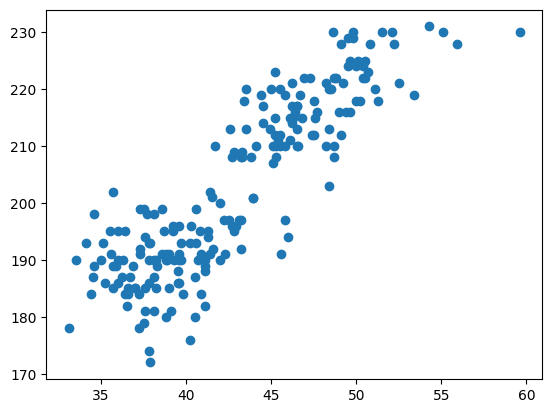

In [77]:
plt.scatter(train_input['bill_length_mm'], train_input['flipper_length_mm'])

In [74]:
kn.score(test_input, test_target['species'])

0.9710144927536232